In [0]:
#!unzip air-pollution-in-seoul.zip

In [2]:
import pandas as pd
import numpy as np
import pickle
from sklearn.externals import joblib 
% matplotlib inline
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/My Drive/Dataset/Measurement_summary.csv')
data.head(10)

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0
5,2017-01-01 05:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.046,0.002,1.1,70.0,61.0
6,2017-01-01 06:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.049,0.002,1.1,66.0,57.0
7,2017-01-01 07:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.045,0.002,1.0,71.0,60.0
8,2017-01-01 08:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.047,0.002,1.1,72.0,60.0
9,2017-01-01 09:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.047,0.002,1.1,74.0,63.0


In [4]:
# Retriving data for station code 105 for O3
data_105=data[(data['Station code']==105) & (data['O3']>0)]
print(len(data_105))
print(data_105.head(10))

24691
        Measurement date  Station code  ...  PM10  PM2.5
103610  2017-01-01 00:00           105  ...  81.0   44.0
103611  2017-01-01 01:00           105  ...  67.0   44.0
103612  2017-01-01 02:00           105  ...  84.0   43.0
103613  2017-01-01 03:00           105  ...  85.0   42.0
103614  2017-01-01 04:00           105  ...  79.0   35.0
103615  2017-01-01 05:00           105  ...  72.0   38.0
103616  2017-01-01 06:00           105  ...  70.0   38.0
103617  2017-01-01 07:00           105  ...  76.0   48.0
103618  2017-01-01 08:00           105  ...  87.0   44.0
103619  2017-01-01 09:00           105  ...  80.0   46.0

[10 rows x 11 columns]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


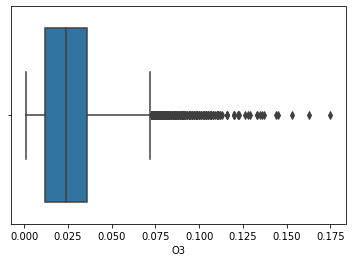

In [5]:
import seaborn as sns
sns.boxplot(data_105['O3'])

24447


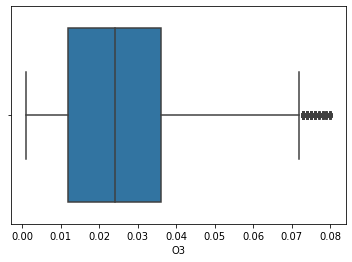

In [6]:
from scipy import stats
z = np.abs(stats.zscore(data_105['O3']))
threshold = 3
#print(len(np.where(z > 3)))
data_105_Rout = data_105[(z < 3)]
print(len(data_105_Rout))
sns.boxplot(data_105_Rout['O3'])

In [7]:
df=data_105_Rout['O3']
df=df.values
df=df.reshape(df.shape[0],1)
print(df.shape)

(24447, 1)


In [8]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)
print(min(df),max(df))
list_=[]
for i in range (0,df_scaled.shape[0]):
  list_.append(df_scaled[i][0])
print(len(list_))
print(min(list_),max(list_))


[0.001] [0.08]
24447
0.0 1.0


In [9]:
window_size=5
y=[]
for i in range (0,len(list_)-window_size):
  x=list_[i:i+window_size]
  y.append(x)
print(len(y),y[0])


24442 [0.0379746835443038, 0.0379746835443038, 0.0379746835443038, 0.05063291139240507, 0.0379746835443038]


In [10]:
matrix=np.matrix(y)
print(matrix.shape)
new_data = pd.DataFrame(matrix,columns=['x1','x2','x3','x4','y'])
new_data.head(10)


(24442, 5)


,x1,x2,x3,x4,y
0,0.037975,0.037975,0.037975,0.050633,0.037975
1,0.037975,0.037975,0.050633,0.037975,0.037975
2,0.037975,0.050633,0.037975,0.037975,0.037975
3,0.050633,0.037975,0.037975,0.037975,0.037975
4,0.037975,0.037975,0.037975,0.037975,0.037975
5,0.037975,0.037975,0.037975,0.037975,0.050633
6,0.037975,0.037975,0.037975,0.050633,0.063291
7,0.037975,0.037975,0.050633,0.063291,0.088608
8,0.037975,0.050633,0.063291,0.088608,0.101266
9,0.050633,0.063291,0.088608,0.101266,0.177215


In [11]:
print(matrix[:,4])

[[0.03797468]
 [0.03797468]
 [0.03797468]
 ...
 [0.17721519]
 [0.24050633]
 [0.08860759]]


In [12]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(matrix[:,0:4],matrix[:,4],test_size=0.33, random_state=42)
lm =linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'linear_regressor_Rout.pkl')
from google.colab import files
files.download('linear_regressor_Rout.pkl')
print(prediction.shape,prediction[0:5])

(8066, 1) [[0.07386141]
 [0.3005637 ]
 [0.2193655 ]
 [0.7371577 ]
 [0.57385091]]


In [13]:
print(model.score(X_train,y_train))
print(model.intercept_)
print(model.coef_)

0.8872846775540625
[0.03079261]
[[-0.03718909  0.01241714 -0.32411628  1.25008827]]


In [14]:
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

mean squared eror :  0.005121997613412828
absolute mean error :  0.050868051052555076
0.8872946297031998


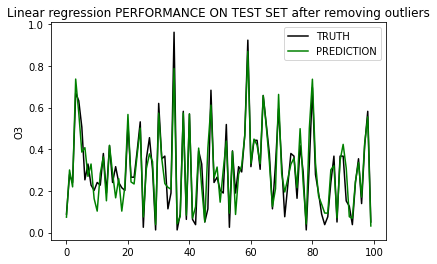

In [15]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Linear regression PERFORMANCE ON TEST SET after removing outliers')
plt.ylabel('O3')
plt.legend()
plt.show()

(24691, 1)
[0.001] [0.175]
24691
0.0 1.0
24686 [0.01724137931034483, 0.01724137931034483, 0.01724137931034483, 0.02298850574712644, 0.01724137931034483]
(8147, 1) [[0.11684981]
 [0.13001086]
 [0.1178191 ]
 [0.30323403]
 [0.35684302]]
mean squared eror :  0.0010830290880079543
absolute mean error :  0.023234507619168867
0.9009339688157806


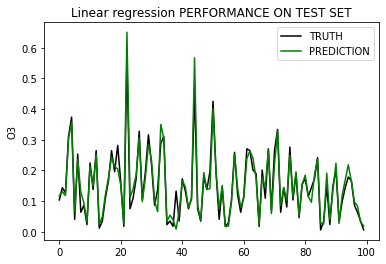

In [16]:
# IMPLEMENTING LINEAR REGRESSION WITHOUT REMOVING OUTLIERS
df=data_105['O3']
df=df.values
df=df.reshape(df.shape[0],1)
print(df.shape)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)
print(min(df),max(df))
list_=[]
for i in range (0,df_scaled.shape[0]):
  list_.append(df_scaled[i][0])
print(len(list_))
print(min(list_),max(list_))
window_size=5
y=[]
for i in range (0,len(list_)-window_size):
  x=list_[i:i+window_size]
  y.append(x)
print(len(y),y[0])
matrix= np.matrix(y)
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(matrix[:,0:4],matrix[:,4],test_size=0.33, random_state=42)
lm =linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'linear_regressor.pkl')
from google.colab import files
files.download('linear_regressor.pkl')
print(prediction.shape,prediction[0:5])
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Linear regression PERFORMANCE ON TEST SET')
plt.ylabel('O3')
plt.legend()
plt.show()

In [17]:
# BAYESIAN RIDGE REGRESSION
from sklearn import linear_model
from statsmodels.tsa.ar_model import AR
model = linear_model.BayesianRidge()

model.fit(X_train,y_train )
prediction=model.predict(X_test)
joblib.dump(model,'bayesian_regressor.pkl')
from google.colab import files
files.download('bayesian_regressor.pkl')
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))

print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean squared eror :  0.0010830348047207391
absolute mean error :  0.023234738345202437
0.9009334459008808


In [18]:
# IMLEMENTING  RANDOM FOREST ALGORITHM
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(max_depth=8, random_state=0)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'randomforest_regressor.pkl')
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


mean squared eror :  0.0010843156717313797
absolute mean error :  0.02321941916115056
0.9008162833863889


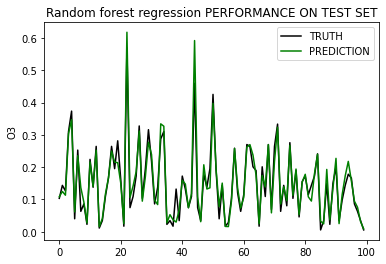

truth :  [[0.10344828]
 [0.14367816]
 [0.12643678]
 [0.31034483]
 [0.37356322]
 [0.04022989]
 [0.25287356]
 [0.06321839]
 [0.0862069 ]
 [0.02298851]]
prediction :  [0.10850038 0.12489639 0.113204   0.30379534 0.34714644 0.06159675
 0.23560362 0.13689175 0.09146057 0.02737383]


In [19]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Random forest regression PERFORMANCE ON TEST SET')
plt.ylabel('O3')
plt.legend()
plt.show()
print('truth : ',y_test[0:10])
print('prediction : ',prediction[0:10])

In [20]:
# RIDGE REGRESSION
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'ridge_regressor.pkl')
from google.colab import files
files.download('ridge_regressor.pkl')
print(mean_squared_error(y_test,prediction))
print(mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))


0.0010926436669117514
0.023400613675534372
0.9000545112055897


In [21]:
# IMPLEMENTING SUPPORT VECTOR
from sklearn.svm import LinearSVR
model= LinearSVR()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean squared eror :  0.0010931541584818733
absolute mean error :  0.022967040499835254
0.9000078159003897


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


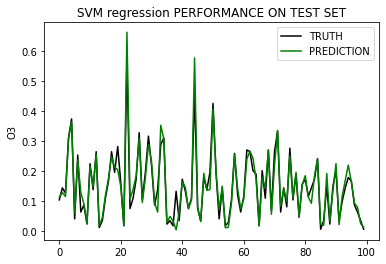

In [22]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('SVM regression PERFORMANCE ON TEST SET')
plt.ylabel('O3')
plt.legend()
plt.show()

In [23]:
# IMPLEMENTING A NEURAL NETWORK
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X = sc.fit_transform(X)
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='relu'))


model.compile(optimizer = "adam", loss ='mse', 
          metrics =["accuracy"])
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

Using TensorFlow backend.


Epoch 1/100
16539/16539 [==============================] - 3s 201us/step - loss: 0.0319 - accuracy: 0.0043
Epoch 2/100
16539/16539 [==============================] - 1s 90us/step - loss: 0.0319 - accuracy: 0.0043
Epoch 3/100
16539/16539 [==============================] - 1s 86us/step - loss: 0.0319 - accuracy: 0.0043
Epoch 4/100
16539/16539 [==============================] - 1s 88us/step - loss: 0.0319 - accuracy: 0.0043
Epoch 5/100
16539/16539 [==============================] - 1s 84us/step - loss: 0.0319 - accuracy: 0.0043
Epoch 6/100
16539/16539 [==============================] - 1s 89us/step - loss: 0.0319 - accuracy: 0.0043
Epoch 7/100
16539/16539 [==============================] - 1s 85us/step - loss: 0.0319 - accuracy: 0.0043
Epoch 8/100
16539/16539 [==============================] - 1s 86us/step - loss: 0.0319 - accuracy: 0.0043
Epoch 9/100
16539/16539 [==============================] - 1s 86us/step - loss: 0.0319 - accuracy: 0.0043
Epoch 10/100
16539/16539 [===================

dict_keys(['loss', 'accuracy'])


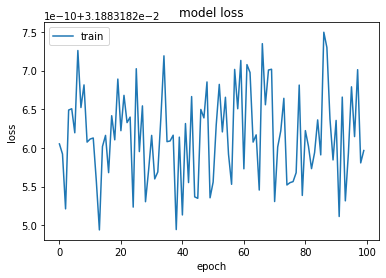

mean squared error :  0.032252230017775343
mean absolute error :  0.022967040499835254
0.9000078159003897


In [24]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
y_pred = model.predict(X_test)
print('mean squared error : ',mean_squared_error(y_test,y_pred))
print('mean absolute error : ',mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))
#Converting predictions to label


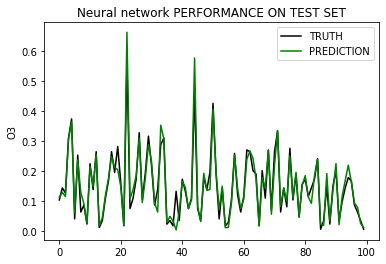

In [25]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Neural network PERFORMANCE ON TEST SET')
plt.ylabel('O3')
plt.legend()
plt.show()

In [26]:
print(X_train)
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)

print(X_train.shape)
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
print(X_train.shape)

[[0.13793103 0.11494253 0.09770115 0.08045977]
 [0.03448276 0.03448276 0.04022989 0.07471264]
 [0.12643678 0.11494253 0.03448276 0.02873563]
 ...
 [0.13793103 0.1091954  0.1091954  0.15517241]
 [0.14942529 0.12068966 0.10344828 0.09195402]
 [0.06896552 0.06896552 0.11494253 0.13793103]]
(16539, 4)
(16539, 4, 1)


In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
#regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
16539/16539 [==============================] - 18s 1ms/step - loss: 0.0049
Epoch 2/100
16539/16539 [==============================] - 16s 994us/step - loss: 0.0012
Epoch 3/100
16539/16539 [==============================] - 16s 994us/step - loss: 0.0012
Epoch 4/100
16539/16539 [==============================] - 17s 1ms/step - loss: 0.0012
Epoch 5/100
16539/16539 [==============================] - 17s 1000us/step - loss: 0.0012
Epoch 6/100
16539/16539 [==============================] - 17s 1ms/step - loss: 0.0012
Epoch 7/100
16539/16539 [==============================] - 17s 998us/step - loss: 0.0011
Epoch 8/100
16539/16539 [==============================] - 18s 1ms/step - loss: 0.0012
Epoch 9/100
16539/16539 [==============================] - 16s 986us/step - loss: 0.0012
Epoch 10/100
16539/16539 [==============================] - 17s 1ms/step - loss: 0.0012
Epoch 11/100
16539/16539 [==============================] - 17s 1ms/step - loss: 0.0012
Epoch 12/100
16539/16539 [====

dict_keys(['loss'])


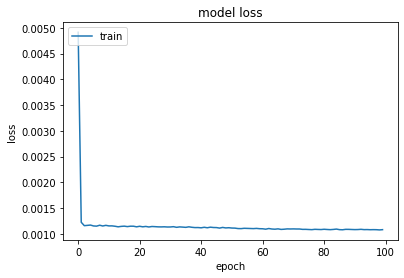

mean square error : 0.001035530003227343
mean absolute error :  0.022819183002283566
0.9052787697691446


In [28]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
prediction = regressor.predict(X_test)
print("mean square error :" ,mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print("mean absolute error : ",mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

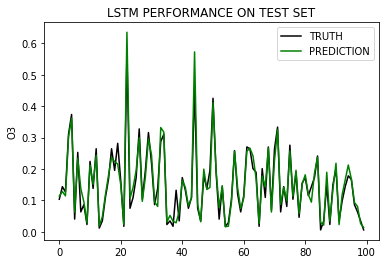

In [29]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('LSTM PERFORMANCE ON TEST SET')
plt.ylabel('O3')
plt.legend()
plt.show()

In [0]:
#joblib.dump(regressor,'lstm_regressor.pkl')
#from google.colab import files
#files.download('lstm_regressor.pkl')